## Summer School on Deep Learning-2019 Surathkal, Karnataka

### Experiment with Activation Functions

**No Activation**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


### MNIST Dataset

* We will be using the MNIST dataset for this set of experiments. The MNIST database consists of handwritten digits which has a training set of 60,000 images and a test set of 10,000 images. Image size is 28 * 28.



* Keras Documentation.

* For more information on the packages and different functions and what each parameter means, please refer the Keras Documentation here : https://keras.io/

### Pre Processing

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
x_train = x_train.reshape(60000, 784) # reshape each image to a vector
x_test = x_test.reshape(10000, 784) # reshape each image to a vector
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255   # Normalize data : Normalisation is required so that all the inputs are at a comparable range. Helps model to learn more features faster.
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


print( 'Train size:', x_train.shape[0])
print( 'Sample  y:', y_train[0])
print('Test size:', x_test.shape[0])

11493376/11490434 [==============================] - 1s 0us/step
Train size: 60000
Sample  y: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Test size: 10000


### Model

In [3]:
model = Sequential()    # The sequential API allows you to create models layer-by-layer for most problems
model.add(Dense(512, input_shape=(784,))) # Input layer , 512 - No of neurons
model.add(Dense(num_classes, activation='softmax'))  # Output layer

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

print (model.summary())

Instructions for updating:
Colocations handled automatically by placer.
dense_1 (None, 784) ==> (None, 512)
dense_2 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


### Compiling and Training the Model

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 70us/step - loss: 0.4014 - acc: 0.8827 - val_loss: 0.3193 - val_acc: 0.9095
Epoch 2/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.3181 - acc: 0.9117 - val_loss: 0.2845 - val_acc: 0.9218
Epoch 3/5
48000/48000 [==============================] - 2s 36us/step - loss: 0.3019 - acc: 0.9149 - val_loss: 0.2897 - val_acc: 0.9209
Epoch 4/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.2940 - acc: 0.9168 - val_loss: 0.2792 - val_acc: 0.9257
Epoch 5/5
10000/10000 [==============================] - 0s 46us/step
Test loss: 0.286
Test accuracy: 0.922


Text(0.5, 0, 'Epochs')

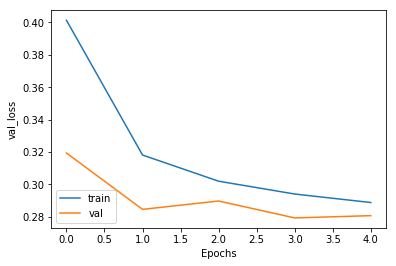

In [4]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2)) 

score = model.evaluate(x_test, y_test, verbose=1)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train','val'],loc=3)
plt.ylabel('val_loss')
plt.xlabel('Epochs')

### Significance of Training loss and Validation loss

There are many interesting observations which you can learn from the above graph. It can tell you if your model is overfiting or underfiting.

Check out this link below for further details :
https://towardsdatascience.com/rnn-training-tips-and-tricks-2bf687e67527

### Adding More Layers Without any Activation

In [5]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Dense(512))
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

print (model.summary())

dense_3 (None, 784) ==> (None, 512)
dense_4 (None, 512) ==> (None, 512)
dense_5 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 47us/step - loss: 0.4672 - acc: 0.8633 - val_loss: 0.3682 - val_acc: 0.8956
Epoch 2/5
48000/48000 [==============================] - 2s 44us/step - loss: 0.3668 - acc: 0.8947 - val_loss: 0.3556 - val_acc: 0.8982
Epoch 3/5
48000/48000 [==============================] - 2s 45us/step - loss: 0.3385 - acc: 0.9028 - val_loss: 0.3111 - val_acc: 0.9138
Epoch 4/5
48000/48000 [==============================] - 2s 45us/step - loss: 0.3248 - acc: 0.9097 - val_loss: 0.3661 - val_acc: 0.8948
Epoch 5/5
10000/10000 [==============================] - 0s 48us/step
Test loss: 0.32
Test accuracy: 0.912


Text(0.5, 0, 'Epochs')

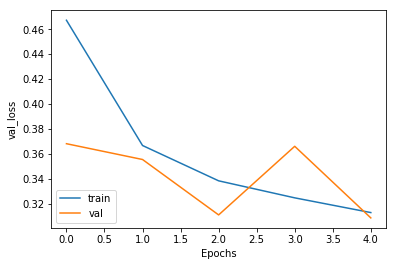

In [6]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2))

score = model.evaluate(x_test, y_test, verbose=1)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train','val'],loc=3)
plt.ylabel('val_loss')
plt.xlabel('Epochs')

For further information on importance of activation function and different types of activation functions, you can go through the link below later.
https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f

### Assignment

### SIgmoid

In [7]:
#sigmoid
model = Sequential()
model.add(Dense(512, activation='sigmoid',input_shape=(784,))) #Add sigmoid activation function
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

print (model.summary())

dense_6 (None, 784) ==> (None, 512)
dense_7 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 39us/step - loss: 0.4689 - acc: 0.8737 - val_loss: 0.2691 - val_acc: 0.9226
Epoch 2/5
48000/48000 [==============================] - 2s 36us/step - loss: 0.2568 - acc: 0.9251 - val_loss: 0.2217 - val_acc: 0.9374
Epoch 3/5
48000/48000 [==============================] - 2s 36us/step - loss: 0.2002 - acc: 0.9409 - val_loss: 0.1873 - val_acc: 0.9464
Epoch 4/5
48000/48000 [==============================] - 2s 37us/step - loss: 0.1600 - acc: 0.9526 - val_loss: 0.1504 - val_acc: 0.9571
Epoch 5/5
10000/10000 [==============================] - 0s 49us/step
Test loss: 0.127
Test accuracy: 0.963


Text(0.5, 0, 'Epochs')

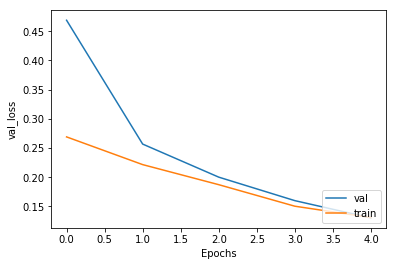

In [8]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2))

score = model.evaluate(x_test, y_test, verbose=1)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['val','train'],loc=4)
plt.ylabel('val_loss')
plt.xlabel('Epochs')

### Relu

In [9]:
#relu
model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(784,))) #Add relu activation function
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

print (model.summary())

dense_8 (None, 784) ==> (None, 512)
dense_9 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 40us/step - loss: 0.2832 - acc: 0.9184 - val_loss: 0.1565 - val_acc: 0.9532
Epoch 2/5
48000/48000 [==============================] - 2s 37us/step - loss: 0.1178 - acc: 0.9656 - val_loss: 0.1139 - val_acc: 0.9648
Epoch 3/5
48000/48000 [==============================] - 2s 37us/step - loss: 0.0778 - acc: 0.9765 - val_loss: 0.1056 - val_acc: 0.9714
Epoch 4/5
48000/48000 [==============================] - 2s 37us/step - loss: 0.0565 - acc: 0.9831 - val_loss: 0.0885 - val_acc: 0.9744
Epoch 5/5
10000/10000 [==============================] - 0s 47us/step
Test loss: 0.065
Test accuracy: 0.98


Text(0.5, 0, 'Epochs')

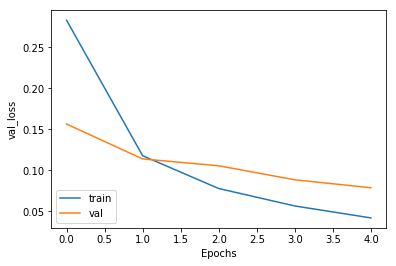

In [10]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2))


score = model.evaluate(x_test, y_test, verbose=1)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train','val'],loc=3)
plt.ylabel('val_loss')
plt.xlabel('Epochs')

### tanh

In [11]:
model = Sequential()
model.add(Dense(512, activation='tanh',input_shape=(784,)))#Add relu activation function
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

print (model.summary())

dense_10 (None, 784) ==> (None, 512)
dense_11 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 46us/step - loss: 0.3638 - acc: 0.8939 - val_loss: 0.2271 - val_acc: 0.9341
Epoch 2/5
48000/48000 [==============================] - 2s 40us/step - loss: 0.1991 - acc: 0.9413 - val_loss: 0.1627 - val_acc: 0.9542
Epoch 3/5
48000/48000 [==============================] - 2s 40us/step - loss: 0.1354 - acc: 0.9596 - val_loss: 0.1252 - val_acc: 0.9644
Epoch 4/5
48000/48000 [==============================] - 2s 40us/step - loss: 0.0986 - acc: 0.9712 - val_loss: 0.1046 - val_acc: 0.9685
Epoch 5/5
10000/10000 [==============================] - 0s 46us/step
Test loss: 0.093
Test accuracy: 0.972


Text(0.5, 0, 'Epochs')

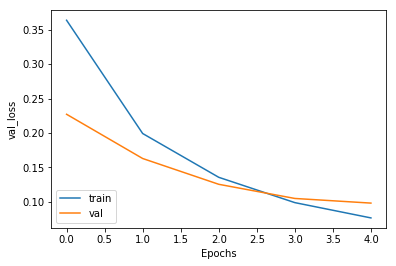

In [12]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2))


score = model.evaluate(x_test, y_test, verbose=1)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train','val'],loc=3)
plt.ylabel('val_loss')
plt.xlabel('Epochs')

### elu

In [13]:
model = Sequential()
model.add(Dense(512, activation='elu',input_shape=(784,)))#Add elu activation function
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

print (model.summary())

dense_12 (None, 784) ==> (None, 512)
dense_13 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 44us/step - loss: 0.3633 - acc: 0.8938 - val_loss: 0.2420 - val_acc: 0.9338
Epoch 2/5
48000/48000 [==============================] - 2s 39us/step - loss: 0.2019 - acc: 0.9413 - val_loss: 0.1593 - val_acc: 0.9560
Epoch 3/5
48000/48000 [==============================] - 2s 37us/step - loss: 0.1369 - acc: 0.9591 - val_loss: 0.1311 - val_acc: 0.9617
Epoch 4/5
48000/48000 [==============================] - 2s 40us/step - loss: 0.1028 - acc: 0.9695 - val_loss: 0.1115 - val_acc: 0.9673
Epoch 5/5
10000/10000 [==============================] - 0s 49us/step
Test loss: 0.104
Test accuracy: 0.967


Text(0.5, 0, 'Epochs')

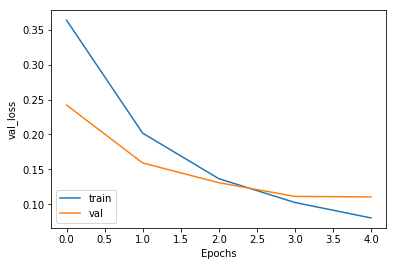

In [14]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2))


score = model.evaluate(x_test, y_test, verbose=1)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train','val'],loc=3)
plt.ylabel('val_loss')
plt.xlabel('Epochs')

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 48us/step - loss: 0.3950 - acc: 0.8840 - val_loss: 0.3010 - val_acc: 0.9151
Epoch 2/10
48000/48000 [==============================] - 2s 37us/step - loss: 0.3182 - acc: 0.9116 - val_loss: 0.2989 - val_acc: 0.9150
Epoch 3/10
48000/48000 [==============================] - 2s 38us/step - loss: 0.3034 - acc: 0.9162 - val_loss: 0.2896 - val_acc: 0.9235
Epoch 4/10
48000/48000 [==============================] - 2s 38us/step - loss: 0.2932 - acc: 0.9186 - val_loss: 0.2867 - val_acc: 0.9228
Epoch 5/10
48000/48000 [==============================] - 2s 38us/step - loss: 0.2882 - acc: 0.9197 - val_loss: 0.2792 - val_acc: 0.9241
Epoch 6/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.2838 - acc: 0.9208 - val_loss: 0.2928 - val_acc: 0.9228
Epoch 7/10
48000/48000 [==============================] - 2s 41us/step - loss: 0.2804 - acc: 0.9219 - val_loss: 0.2850 - val_acc

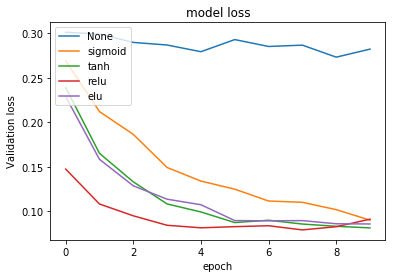

In [15]:
epochs = 10

for activation in [None, 'sigmoid', 'tanh', 'relu','elu']:
    model = Sequential()
    model.add(Dense(512, activation=activation, input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=(0.2))
    
    plt.plot(history.history['val_loss'])
    
plt.title('model loss')
plt.ylabel('Validation loss')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu','elu'], loc='upper left')
